In [1]:
# Instala ultralytics
%pip install ultralytics
# Importa libreria ultralytics
import ultralytics
# Revisa y visualiza las capacidades computacionales del computador virtual
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import settings

# Update a setting
settings.update({'runs_dir': '/content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/runs/segment/train'})

In [ ]:
!yolo task=detect mode=train model=yolov8x-seg.pt data= /content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/data.yaml epochs=10 imgsz=640 save_period=1

100% 137M/137M [00:00<00:00, 315MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_l

In [ ]:
# !yolo task=detect mode=train resume model=/content/drive/MyDrive/JMB/checkpoints/last_25102023_0251_l.pt data= /content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/data.yaml epochs=40 imgsz=640 plots=True save_period=1

In [4]:
!ls /content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/runs/segment/train

segment


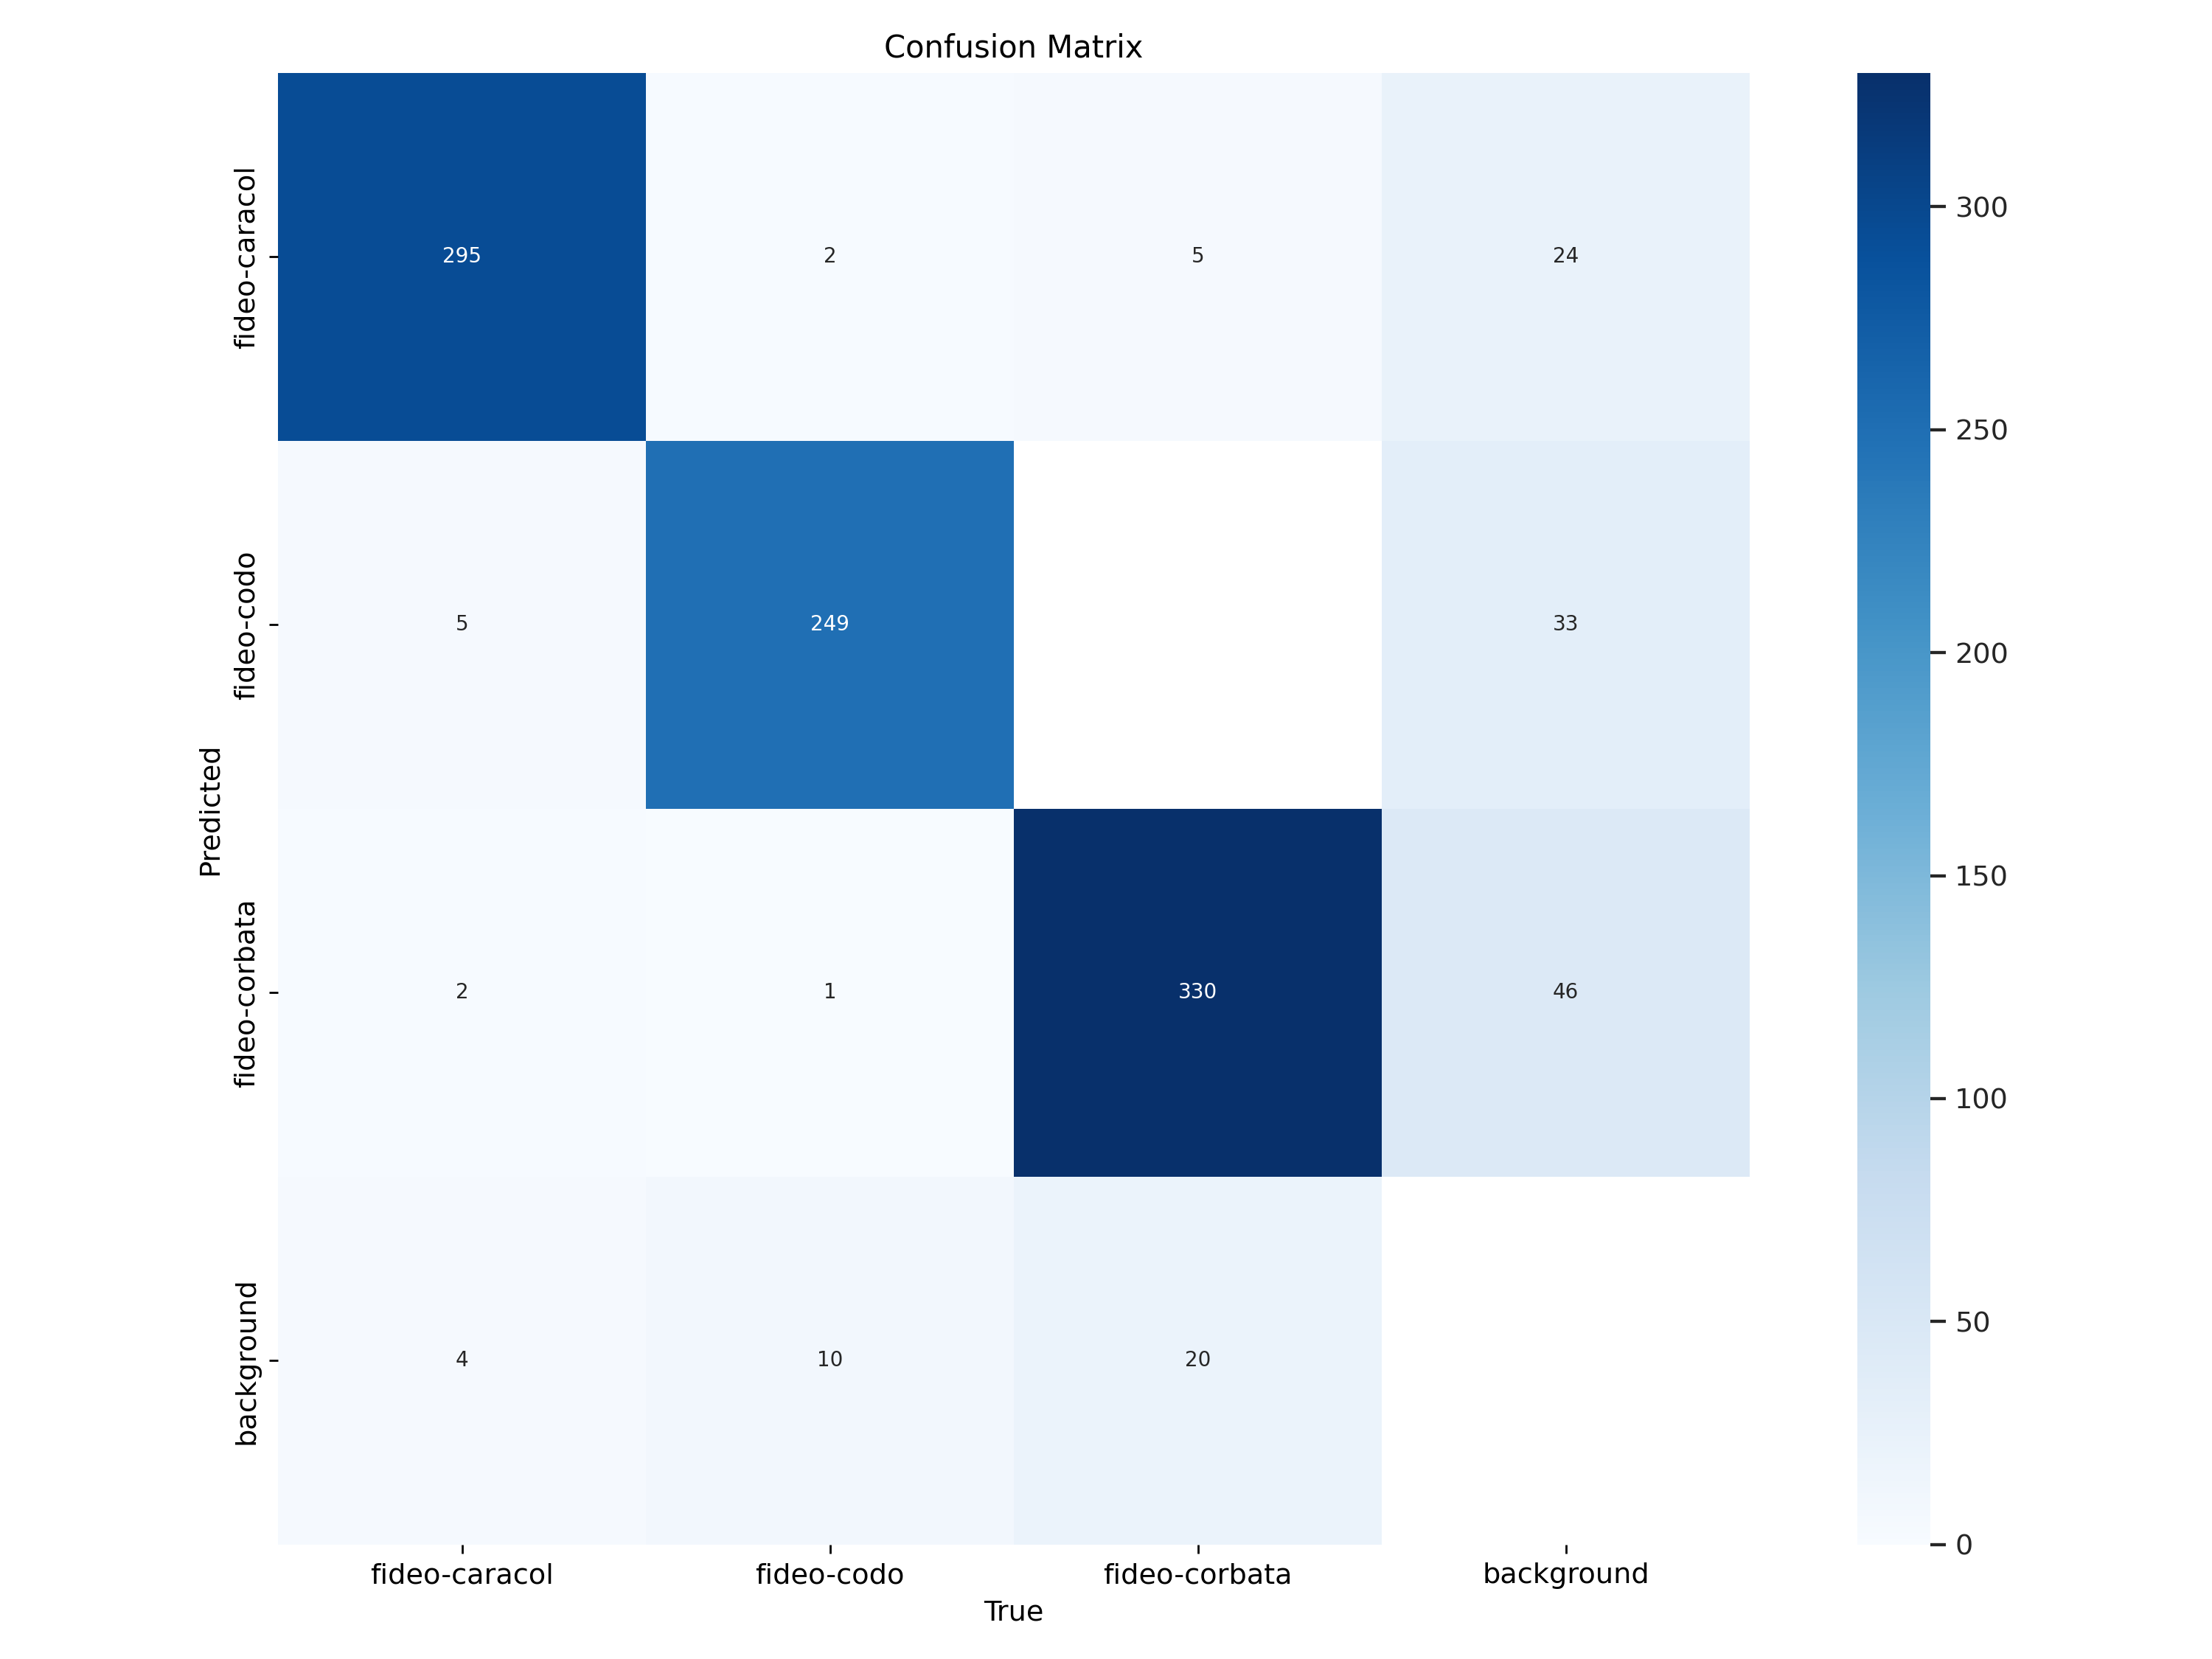

In [5]:
Image(filename='/content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/runs/segment/train/segment/train/confusion_matrix.png', width=600)


In [6]:
!ls /content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/runs/segment/train/segment/train

args.yaml					   labels.jpg	     train_batch2.jpg
BoxF1_curve.png					   MaskF1_curve.png  val_batch0_labels.jpg
BoxP_curve.png					   MaskP_curve.png   val_batch0_pred.jpg
BoxPR_curve.png					   MaskPR_curve.png  val_batch1_labels.jpg
BoxR_curve.png					   MaskR_curve.png   val_batch1_pred.jpg
confusion_matrix_normalized.png			   results.csv	     val_batch2_labels.jpg
confusion_matrix.png				   results.png	     val_batch2_pred.jpg
events.out.tfevents.1699584161.9623c5e38563.759.0  train_batch0.jpg  weights
labels_correlogram.jpg				   train_batch1.jpg


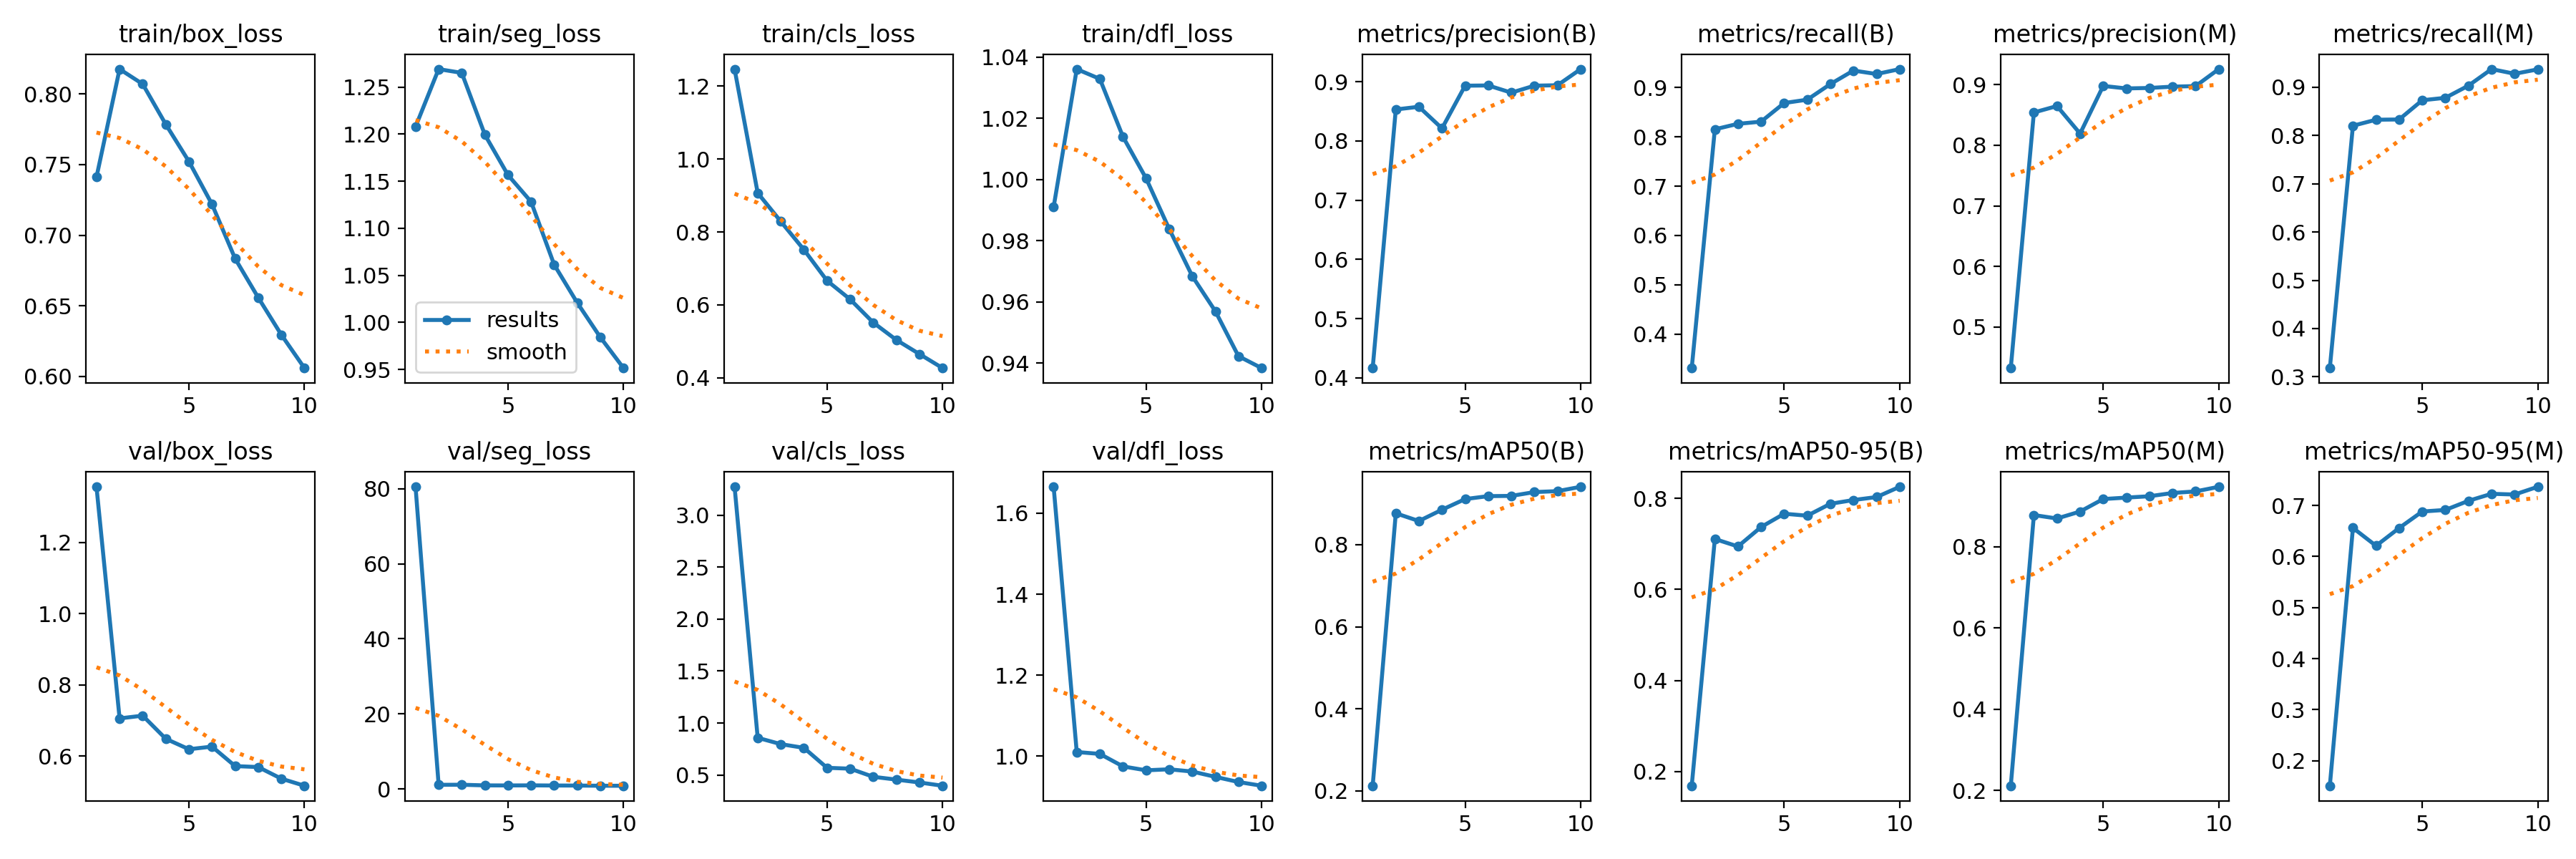

In [7]:
Image(filename='/content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/runs/segment/train/segment/train/results.png', width=800)

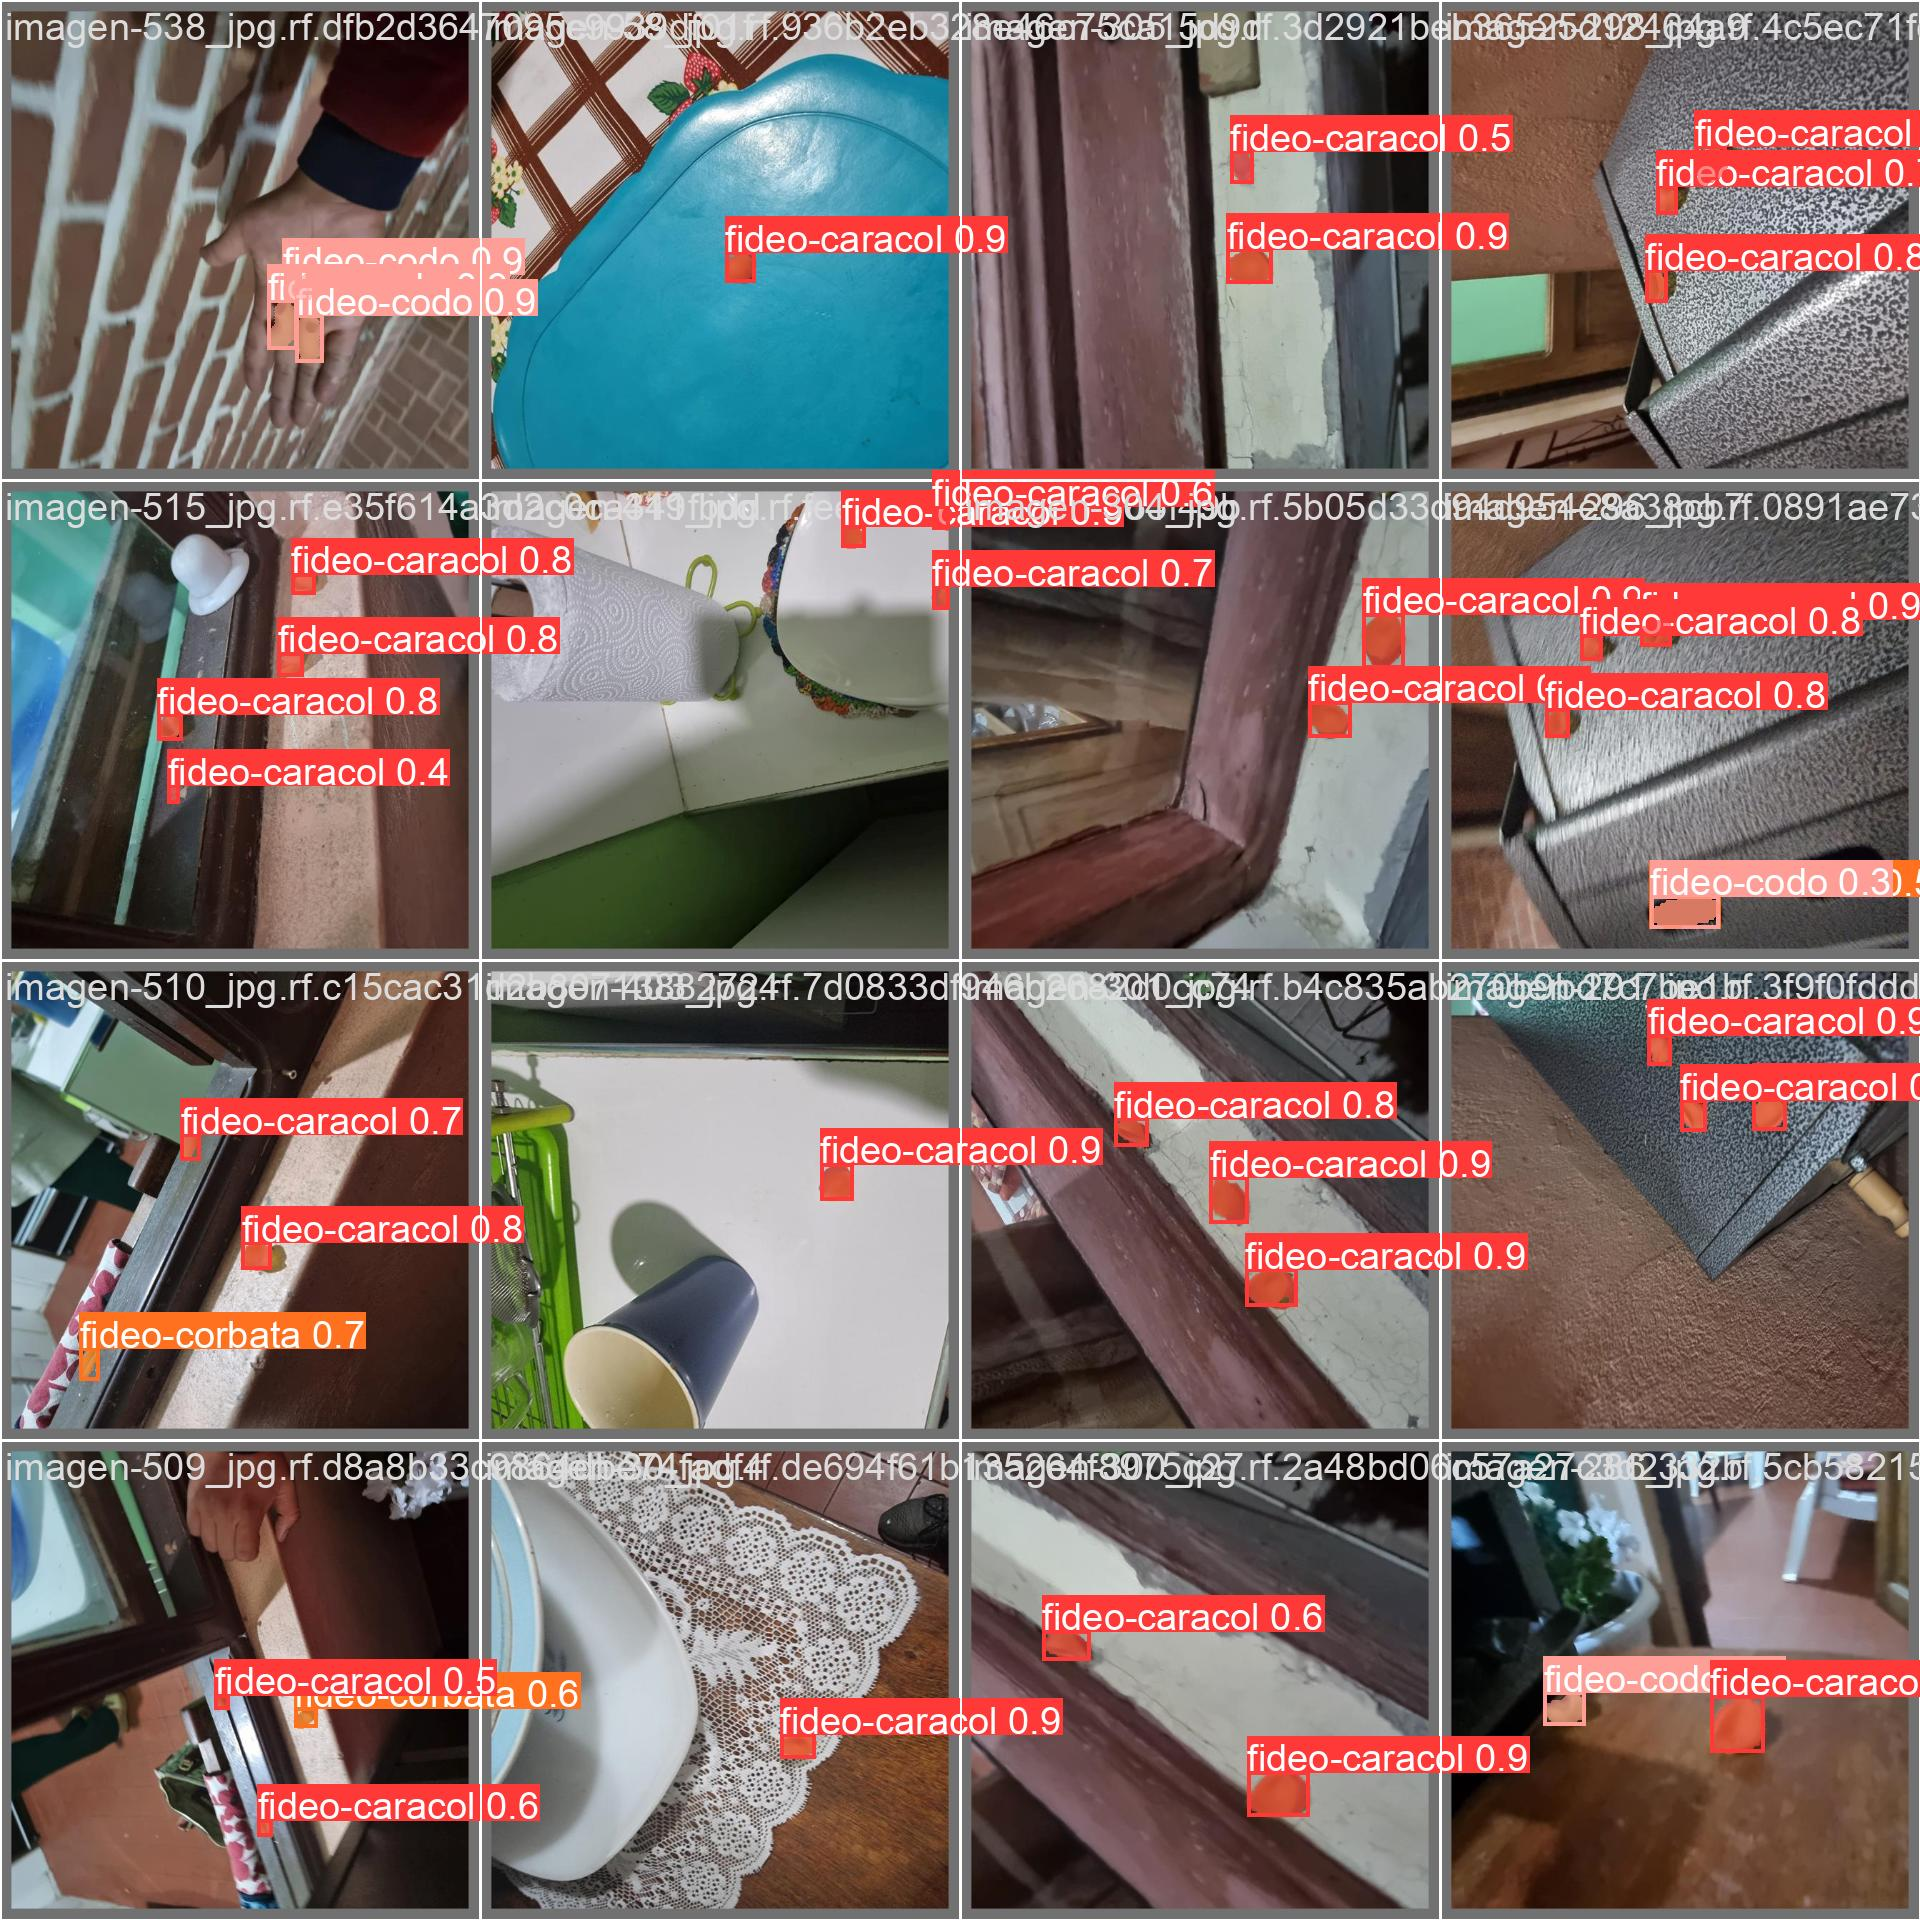

In [8]:
Image(filename='/content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/runs/segment/train/segment/train/val_batch1_pred.jpg', width=600)

In [9]:
!yolo task=detect mode=val model=/content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/runs/segment/train/segment/train/weights/best.pt data=/content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71723545 parameters, 0 gradients, 343.7 GFLOPs
100% 755k/755k [00:00<00:00, 15.4MB/s]
val: Scanning /content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/valid/labels.cache... 305 images, 1 backgrounds, 0 corrupt: 100% 305/305 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 20/20 [00:33<00:00,  1.68s/it]
                   all        305        923      0.921      0.937      0.941      0.829      0.926      0.938      0.947      0.728
         fideo-caracol        305        306      0.948      0.961      0.956      0.843      0.948      0.956      0.956      0.752
            fideo-codo        305        262      0.899

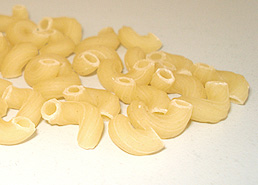

In [11]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='codo_s'
img =cv2.imread(f"/content/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/{img_name}.jpg", width=800)

In [12]:
model= YOLO("/content/drive/MyDrive/yolo8/Tipos_Fideos_yolov8/runs/segment/train/segment/train/weights/best.pt")
pred= model.predict(img)[0]
pred= pred.plot()
cv2.imwrite(f"{img_name}.jpg", pred)


0: 480x640 4 fideo-codos, 223.1ms
Speed: 2.5ms preprocess, 223.1ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)


True

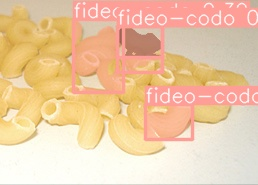

In [14]:
Image(filename=f"/content/{img_name}.jpg", width=800)